<center><img src="./images/nup_logo_dark.jpeg" width=300 style="display: inline-block;"></center> 

## ML with Python
### Intro to language modelling: Multi Layer Perceptron

<br />
November 21, 2023

### [Makemore](https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/makemore) by Andrej Karpathy
### [Bengio et al. 2003 MLP language model paper (pdf)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

![simple_MLP_for_LM](images/simple_MLP_for_LM.png)

In [42]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures

In [43]:
words = open('resources/names.txt', 'r').read().splitlines()

In [44]:
words[:7]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia']

In [45]:
len(words)

32033

In [46]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [47]:
# build the dataset

block_size = 5 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:7]:
  
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

emma
..... ---> e
....e ---> m
...em ---> m
..emm ---> a
.emma ---> .
olivia
..... ---> o
....o ---> l
...ol ---> i
..oli ---> v
.oliv ---> i
olivi ---> a
livia ---> .
ava
..... ---> a
....a ---> v
...av ---> a
..ava ---> .
isabella
..... ---> i
....i ---> s
...is ---> a
..isa ---> b
.isab ---> e
isabe ---> l
sabel ---> l
abell ---> a
bella ---> .
sophia
..... ---> s
....s ---> o
...so ---> p
..sop ---> h
.soph ---> i
sophi ---> a
ophia ---> .
charlotte
..... ---> c
....c ---> h
...ch ---> a
..cha ---> r
.char ---> l
charl ---> o
harlo ---> t
arlot ---> t
rlott ---> e
lotte ---> .
mia
..... ---> m
....m ---> i
...mi ---> a
..mia ---> .


In [48]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


In [49]:
X, Y = build_dataset(words[:5])
print((X.shape, X.dtype), '\n', (Y.shape, Y.dtype))

torch.Size([32, 3]) torch.Size([32])
(torch.Size([32, 3]), torch.int64) 
 (torch.Size([32]), torch.int64)


In [50]:
import random
random.seed(42)

# build the dataset
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [51]:
C = torch.randn((27, 2))
C.shape

torch.Size([27, 2])

In [52]:
C[5]

tensor([-0.9679, -0.2233])

In [53]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [54]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.9679, -0.2233])

In [55]:
C[torch.tensor([5,5,5,5])]

tensor([[-0.9679, -0.2233],
        [-0.9679, -0.2233],
        [-0.9679, -0.2233],
        [-0.9679, -0.2233]])

In [56]:
emb = C[X]
print(X.shape, '\n', emb.shape)

torch.Size([32, 3]) 
 torch.Size([32, 3, 2])


In [57]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [58]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [59]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [60]:
h.shape

torch.Size([32, 100])

In [61]:
h

tensor([[-0.7702, -0.9851,  0.6498,  ..., -0.4329, -0.7788, -0.5455],
        [-0.9127, -0.9204, -0.0756,  ..., -0.0036, -0.8290, -0.9733],
        [-0.9737, -0.9968,  0.8788,  ..., -0.7667, -0.9702, -0.9999],
        ...,
        [-0.4108, -0.9388,  0.9909,  ..., -0.9644, -0.9719,  0.9998],
        [ 0.9874,  0.7489,  0.8941,  ...,  0.7349, -0.9876, -0.1617],
        [-0.9406,  0.9986, -0.9998,  ...,  0.9981, -0.2748,  0.9692]])

In [62]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [63]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [64]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [65]:
Y, len(Y)

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 32)

In [66]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.4447)

In [67]:
# the same result, but much more optimal
F.cross_entropy(logits, Y)

tensor(15.4447)

In [68]:
# ------------ now made respectable :) ---------------

In [69]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [85]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g) # need (27, 10) for better loss 
W1 = torch.randn((6, 200), generator=g) # and then here is 30 too of course
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [86]:
sum(p.nelement() for p in parameters) # number of parameters in total

6881

In [87]:
for p in parameters:
  p.requires_grad = True

In [88]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre
# 
# lri = []
lossi = []
stepi = []

for i in range(20000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

24.10672950744629
16.68449592590332
18.83670997619629
17.53367042541504
16.492170333862305
15.566131591796875
12.367076873779297
11.762935638427734
11.823022842407227
13.757163047790527
14.067609786987305
14.289260864257812
9.966116905212402
10.950499534606934
11.19556713104248
9.621066093444824
10.832076072692871
10.801009178161621
10.727668762207031
8.357904434204102
9.416796684265137
7.63020133972168
6.561916828155518
6.433480739593506
6.933467388153076
7.500145435333252
10.281460762023926
8.187897682189941
8.51466178894043
7.004068851470947
7.540497303009033
8.816584587097168
8.512511253356934
9.567564010620117
5.207958221435547
6.503924369812012
6.047211170196533
7.3106369972229
7.645363807678223
8.238901138305664
9.181391716003418
7.955752849578857
5.822470664978027
5.668406963348389
6.6720709800720215
6.723045349121094
5.770787239074707
5.238466262817383
5.458746910095215
6.045187950134277
6.4911789894104
5.002527236938477
6.263179779052734
6.7887282371521
5.694857120513916
6.23

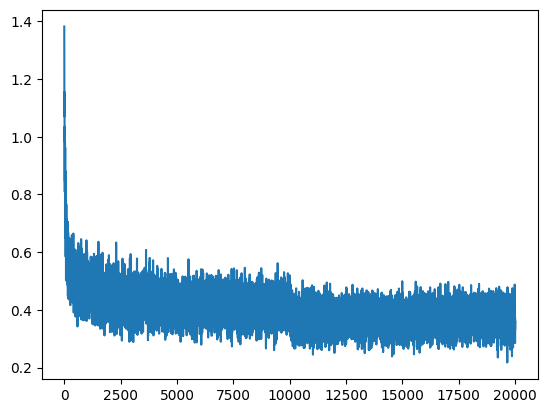

In [89]:
plt.plot(stepi, lossi)

In [91]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3675, grad_fn=<NllLossBackward0>)

In [92]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3623, grad_fn=<NllLossBackward0>)

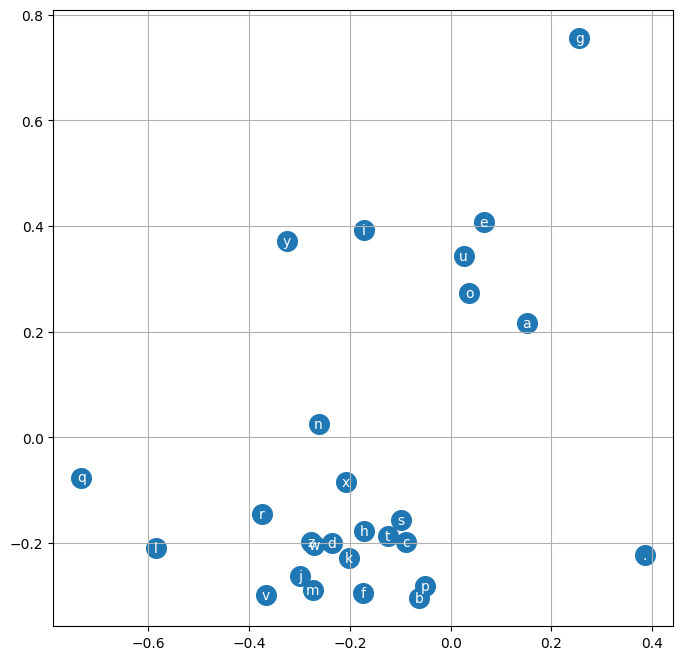

In [93]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

What else can you check out?
 
[Building makemore Part2: MLP](https://youtu.be/TCH_1BHY58I)

In [94]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 2])

In [96]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(5):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mria.
mayannieen.
ndheyah.
rethrsiendrari.
azeredielin.
